This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

About this file
Attribute Information: (classes: edible=e, poisonous=p)
cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
bruises: bruises=t,no=f
odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
gill-attachment: attached=a,descending=d,free=f,notched=n
gill-spacing: close=c,crowded=w,distant=d
gill-size: broad=b,narrow=n
gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
stalk-shape: enlarging=e,tapering=t
stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
veil-type: partial=p,universal=u
veil-color: brown=n,orange=o,white=w,yellow=y
ring-number: none=n,one=o,two=t
ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

# 1. Introduction
This dataset about any mushroom is a safe to eat or deadly poison. I will examine the data and I will create a machine learning algorythm which is detects any mushroom is edible or poisinous due to it's specifications like cap shape-color or gill color-size. Let's examine the data.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("mushrooms.csv")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


# 2. Examine Data

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df["class"].unique()

array(['p', 'e'], dtype=object)

We have a class column which is giving the mushrooms poisinous(p) or edible(e). Also other 22 features has string values too. So we should change the data types to int or float. Also I found about the "veil-type" has just one unique value and it's "p", we should get rid of it. But how can we do that? Let's look on the next section.

# 3. Manipulating the Data

In [6]:
# Changing class values to "1" and "0"s.
df["class"] = [1 if i == "p" else 0 for i in df["class"]]

In [7]:
# Dropping "veil-type" column.
df.drop("veil-type",axis=1,inplace=True)

In [15]:
for column in df.drop(["class"], axis=1).columns:
    value = 0
    step = 1/(len(df[column].unique())-1)
    for i in df[column].unique():
       df[column] = [value if letter == i else letter for letter in df[column]]
       value += step

In [14]:
# for column in df.drop(["class"], axis=1).columns:

#     #print(column) # it will print all the columns except the specified column in drop command
#     value = 0
#     step = 1/(len(df[column].unique())-1)
#    for i in df[column].unique():
for letter in df[column]:
    print(letter)
        
#        df[column] = [value if letter == i else letter for letter in df[column]]
#        value += step
     
       
        

u
g
m
u
g
g
m
m
g
m
g
m
g
u
g
u
g
g
u
u
m
g
m
m
m
g
m
m
u
d
m
u
m
p
m
d
u
u
d
m
g
p
u
g
m
g
m
m
p
p
g
g
m
u
u
m
g
g
g
p
u
m
m
m
g
g
g
g
g
u
d
m
d
p
g
d
d
p
u
g
g
g
u
g
g
g
g
g
g
u
u
g
g
m
g
g
g
g
g
g
g
g
g
p
g
m
g
m
m
m
g
u
d
m
u
g
u
g
d
u
g
m
g
g
m
g
g
g
g
m
g
m
d
m
d
u
d
g
g
g
p
m
u
p
g
g
g
m
g
m
g
g
g
u
d
g
g
g
m
g
m
g
u
g
g
p
g
m
g
g
u
g
d
g
g
m
m
g
m
g
u
u
u
m
p
g
m
u
g
p
g
d
m
d
m
u
g
m
m
d
g
g
g
g
p
u
g
m
g
g
g
m
d
u
g
m
g
g
g
u
m
g
g
d
m
g
g
g
u
g
u
u
p
u
g
d
g
g
g
p
p
g
m
u
d
g
d
m
p
g
g
g
u
m
g
m
u
m
g
m
g
g
g
m
d
u
g
m
m
u
m
u
g
m
p
p
g
m
g
m
g
m
u
m
m
g
m
g
p
u
u
g
m
g
m
m
m
g
d
g
g
g
d
g
g
d
m
m
g
g
g
g
g
d
g
u
d
m
d
d
m
d
g
m
p
g
m
u
g
g
u
m
m
g
g
d
g
g
u
g
g
g
m
d
g
g
d
m
g
u
g
p
g
m
p
u
p
u
p
g
g
g
g
p
g
u
p
d
g
g
g
g
m
u
m
g
u
m
g
g
u
g
m
g
d
u
p
g
m
m
m
m
g
u
g
g
m
m
u
u
g
m
u
m
m
m
g
m
g
p
m
g
p
g
g
g
d
u
g
g
g
m
u
g
m
d
p
m
g
u
g
g
g
g
d
m
d
m
m
p
m
m
p
m
m
g
g
g
m
d
m
g
m
d
m
g
g
m
p
p
m
g
g
m
u
g
m
g
g
p
g
m
d
u
d
u
u
g
d
m
m
g
d
u
d
g
m
u
p
p
d
g
u
p
g
m
g
g
g
m


In [8]:
df["cap-shape"].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [16]:
df_check = df.head()
df_check = df_check.append(df.tail())
df_check

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00,0.000,0.000000,0.0,0.00,0.000,0.0,0.000000
1,0,0.0,0.000000,0.111111,0.0,0.125,0.0,0.0,1.0,0.000000,...,0.0,0.0,0.00,0.000,0.000000,0.0,0.00,0.125,0.2,0.166667
2,0,0.2,0.000000,0.222222,0.0,0.250,0.0,0.0,1.0,0.090909,...,0.0,0.0,0.00,0.000,0.000000,0.0,0.00,0.125,0.2,0.333333
3,1,0.0,0.333333,0.222222,0.0,0.000,0.0,0.0,0.0,0.090909,...,0.0,0.0,0.00,0.000,0.000000,0.0,0.00,0.000,0.0,0.000000
4,0,0.0,0.000000,0.333333,1.0,0.375,0.0,1.0,1.0,0.000000,...,0.0,0.0,0.00,0.000,0.000000,0.0,0.25,0.125,0.4,0.166667
8119,0,0.8,0.000000,0.000000,1.0,0.375,1.0,0.0,1.0,0.909091,...,0.0,0.0,0.75,0.875,0.666667,0.0,0.00,1.000,1.0,1.000000
8120,0,0.0,0.000000,0.000000,1.0,0.375,1.0,0.0,1.0,0.909091,...,0.0,0.0,0.75,0.875,0.333333,0.0,0.00,1.000,0.6,1.000000
8121,0,0.6,0.000000,0.000000,1.0,0.375,1.0,0.0,1.0,0.090909,...,0.0,0.0,0.75,0.875,0.666667,0.0,0.00,1.000,1.0,1.000000
8122,1,0.8,0.333333,0.000000,1.0,0.750,0.0,0.0,0.0,0.727273,...,0.0,1.0,0.00,0.000,0.000000,0.0,0.25,0.500,0.6,1.000000
8123,0,0.0,0.000000,0.000000,1.0,0.375,1.0,0.0,1.0,0.909091,...,0.0,0.0,0.75,0.875,0.666667,0.0,0.00,0.750,1.0,1.000000


# 4. Preparing Data for Machine Learning

In [17]:
from sklearn.model_selection import train_test_split
y = df["class"].values # "class" column as numpy array.
X = df.drop(["class"], axis=1).values# All data except "class" column. 
                                     #I didn't use normalization because all data has values between 0 and 1.
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)    # Split data for train and test.

# 5. Classification Methods

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs")
lr.fit(X_train,y_train)
print("Test Accuracy: {}%".format(round(lr.score(X_test,y_test)*100,2)))

Test Accuracy: 97.05%


In [19]:
from sklearn.svm import SVC
svm = SVC(random_state=42, gamma="auto")
svm.fit(X_train,y_train)
print("Test Accuracy: {}%".format(round(svm.score(X_test,y_test)*100,2)))

Test Accuracy: 97.54%


In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train,y_train)
print("Test Accuracy: {}%".format(round(rfc.score(X_test,y_test)*100,2)))

Test Accuracy: 100.0%


# 6. Creating a Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix
y_pred_lr = lr.predict(X_test)
y_true_lr = y_test
cm = confusion_matrix(y_true_lr, y_pred_lr)


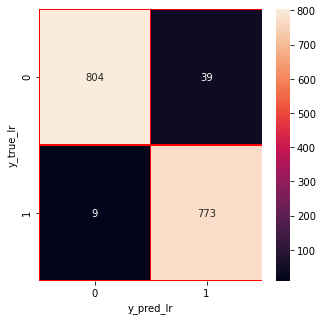

In [22]:
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_lr")
plt.ylabel("y_true_lr")
plt.show()

In [23]:
y_pred_rfc = rfc.predict(X_test)
y_true_rfc = y_test
cm = confusion_matrix(y_true_rfc, y_pred_rfc)

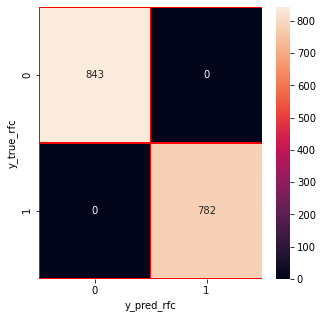

In [24]:
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_rfc")
plt.ylabel("y_true_rfc")
plt.show()

# 7. Conclusion
With confusion matrix we saw that our train and test datas balanced, so there is no problem in there.
Most of classfication methods hit 100% accuracy with this dataset.

In [ ]:
# Time Series Analysis
# PCA
# Dimensionality Reduction
# Silhoutte Score
# L1 and L2 reguralization techniques
# Log loss
# C and gamma(SVC) in detail